In [13]:
import numpy as np
from SimPEG import Mesh
from SimPEG.Utils import meshTensor
from EMTD.Utils import hzAnalyticDipoleT_CC
from scipy.constants import mu_0
import matplotlib.pyplot as plt
from EMTD import EMTD_bConv


## Build the mesh
cs = 5.
ncx = 25
ncy = 10
npad = 25
hx = meshTensor([(cs,ncx), (cs, npad, 1.3)])
hy = np.r_[2*np.pi]
hz = meshTensor([(cs,npad,-1.3), (cs,ncy), (cs,npad,1.3)])
m = Mesh.CylMesh([hx,hy,hz], [0., 0., -hz.sum()/2])

## Setup up models
sigmaInf = 1e-8*np.ones(m.nC)
sigmaInf[m.gridCC[:,-1]<0] = 1e-2
eta = np.zeros_like(sigmaInf)
eta[m.gridCC[:,-1]<0] = 0.75
tau = np.ones_like(eta)*0.01
c = np.ones_like(eta)*0.4

times = [np.r_[1e-6, 1e-5, 5e-5, 1e-4, 5e-4], 
         np.r_[  20,   20,   20,   20,   20]]

## Setup problem and run
em = EMTD_bConv()
em.mesh = m
em.sigmaInf = sigmaInf
em.eta = eta
em.tau = tau
em.c = c
em.txLoc = np.array([[0., 0., 0.]])
em.rxLoc = np.array([[50., 0., 0.]])
em.RxType = 'Fz'
em.setTimes(times[0], times[1])
em.tObs = np.logspace(-4,-2,20)
em.runPardiso()


>>Initial fields: use STEPOFF
Factoring 1 of 5...
Factor time:  0.000393867492676
Done @ 2017-03-13 23:04:58.262303
>> Initialize b
>> Initialize e
>> Initialize j
Factoring 2 of 5...
Factor time:  0.000411987304688
Done @ 2017-03-13 23:05:01.696386
Factoring 3 of 5...
Factor time:  0.000478982925415
Done @ 2017-03-13 23:05:08.513480
Factoring 4 of 5...
Factor time:  0.00047492980957
Done @ 2017-03-13 23:05:19.187089
Factoring 5 of 5...
Factor time:  0.000421047210693
Done @ 2017-03-13 23:05:33.045944
FactorTime 0.00218081474304
RhsTime 45.7719035149
SolveTime 0.134783267975
UpdateTime 7.12273621559
TimeAll 53.2295539379


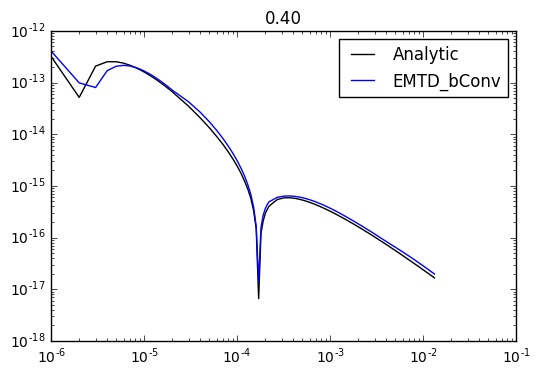

In [14]:
## View the results
bza = mu_0*hzAnalyticDipoleT_CC(em.rxLoc[0,0], em.tCalc, sigmaInf=em.sigmaInf[0], eta=em.eta[0], tau=em.tau[0], c=em.c[0])
fig = plt.figure(1)
fig.clf()
ax = fig.add_subplot(111)
ax.loglog(em.tCalc, np.abs(bza),'k', label='Analytic')
ax.loglog(em.tCalc, np.abs(em.data),'b', label='EMTD_bConv')
ax.set_title('%.2f' %c[0])
ax.legend()
plt.show()